<a href="https://colab.research.google.com/github/Giandonn/Machine-Learning/blob/main/RedesNeurais.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

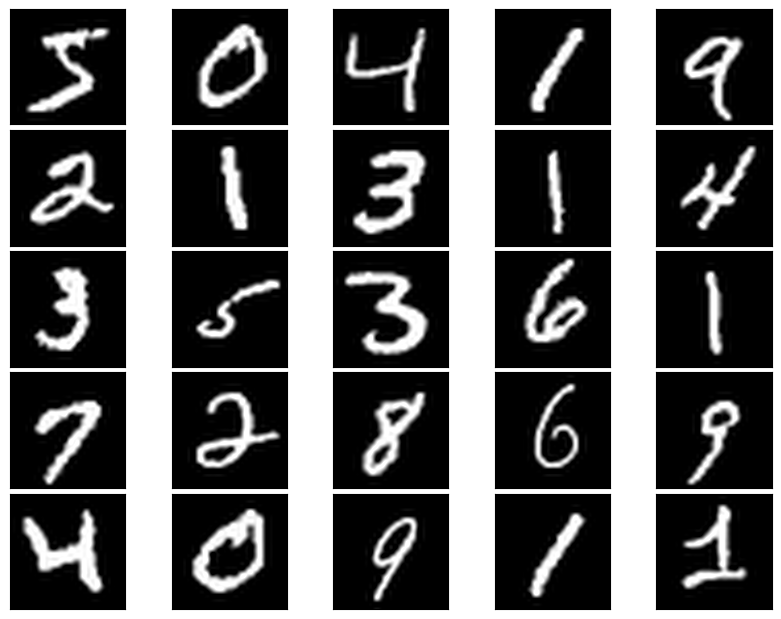

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras import layers
import matplotlib.pyplot as plt

mnist = keras.datasets.mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

fig = plt.figure(figsize=(8,6))
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)
for numero_img in range(25):
    ax = fig.add_subplot(5,5, numero_img+1, xticks=[], yticks=[])
    ax.imshow(X_train[numero_img], cmap=plt.cm.gray, interpolation='lanczos')
plt.show()

In [5]:
X_train = np.expand_dims(X_train, -1)
X_test = np.expand_dims(X_test, -1)

num_class = 10
y_train = keras.utils.to_categorical(y_train, num_class)
y_test = keras.utils.to_categorical(y_test, num_class)

input_shape = (28, 28, 1)

modelo_cnn = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(32, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(num_class, activation='softmax')
    ]
)

print(modelo_cnn.summary())

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │        16,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 34,826 (136.04 KB)

 Trainable params: 34,826 (136.04 KB)

 Non-trainable params: 0 (0.00 B)

None


In [ ]:
modelo_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

batch_size = 128
epochs = 20
modelo_cnn.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_split=0.1)

Epoch 1/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 56s 128ms/step - accuracy: 0.7928 - loss: 4.6981 - val_accuracy: 0.9683 - val_loss: 0.1407
Epoch 2/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 85s 135ms/step - accuracy: 0.9660 - loss: 0.1340 - val_accuracy: 0.9763 - val_loss: 0.0912
Epoch 3/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 80s 131ms/step - accuracy: 0.9778 - loss: 0.0740 - val_accuracy: 0.9830 - val_loss: 0.0679
Epoch 4/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 56s 133ms/step - accuracy: 0.9845 - loss: 0.0531 - val_accuracy: 0.9790 - val_loss: 0.0841
Epoch 5/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 130ms/step - accuracy: 0.9866 - loss: 0.0438 - val_accuracy: 0.9858 - val_loss: 0.0592
Epoch 6/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 79s 124ms/step - accuracy: 0.9886 - loss: 0.0366 - val_accuracy: 0.9832 - val_loss: 0.0726
Epoch 7/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 81s 122ms/step - accuracy: 0.9904 - loss: 0.0287 - val_accuracy: 0.9885 - val_loss: 0.0560
Epoch 8/20
422/422 ━━━━━━━━━━━━━━━━━━━━ 86s 131ms/step - accuracy: 0.9916 - loss: 0

In [ ]:
score = modelo_cnn.evaluate(X_test, y_test)
print("Erro no teste: ", round(score[0], 5))
print("Acurácia no teste: ", round(score[1], 5))

modelo_cnn.save('modelo_cnn_20_epocas_24_07_2024.keras')

In [ ]:
from tensorflow.keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train.shape, y_train.shape, X_test.shape, y_test.shape

In [ ]:
modelo_cifar = keras.Sequential(
    [
        layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
        layers.MaxPooling2D(pool_size=(2,2)),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10)
    ]
)

print(modelo_cifar.summary())

In [ ]:
modelo_cifar.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy'])

history = modelo_cifar.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

In [ ]:
score = modelo_cifar.evaluate(X_test, y_test)
print("Erro no teste: ", round(score[0], 5))
print("Acurácia no teste: ", round(score[1], 5))

# Salvando o modelo
modelo_cifar.save('modelo_cifar_24_07_2024.keras')